# Customer Churn Predictive Model

In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import re

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

Data Preparation and Preprocessing

In [5]:
df = pd.read_csv(r"C:\Users\Samiksha\Downloads\bank-marketing-uci\bank.csv")

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
print(df['y'].value_counts())

no     4000
yes     521
Name: y, dtype: int64


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df.loc[:,:].describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [10]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [11]:
cont_cols = df.select_dtypes(include=[np.number])
cate_cols = df.select_dtypes(exclude=[np.number])

In [12]:
cate_cols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [13]:
cont_cols.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

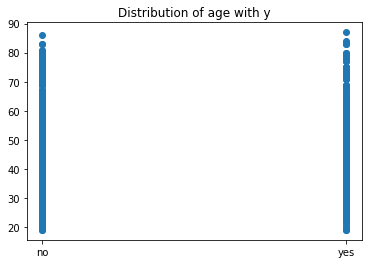

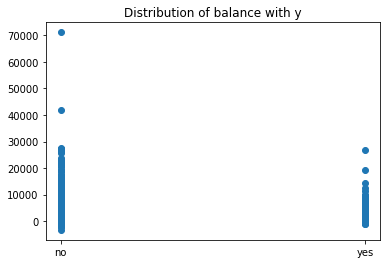

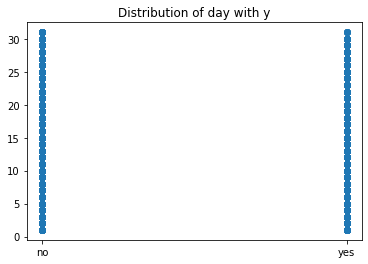

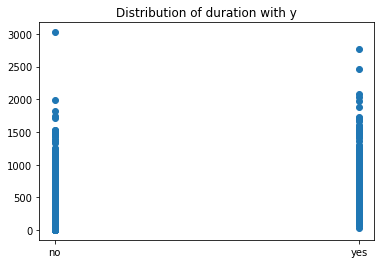

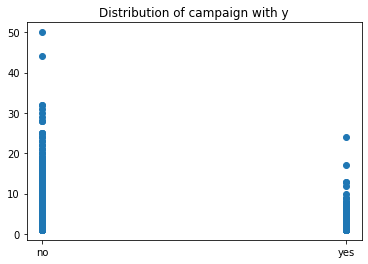

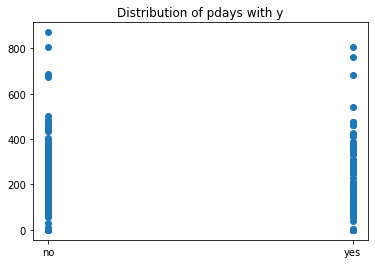

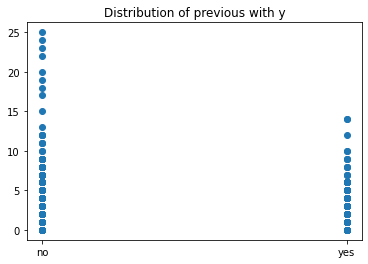

In [14]:
for col in cont_cols:
    fig,ax1 = plt.subplots(1)
    x=df['y']
    y=cont_cols
    plt.scatter(df['y'],df[col])
    plt.title(f'Distribution of {col} with y')
    plt.show()
    

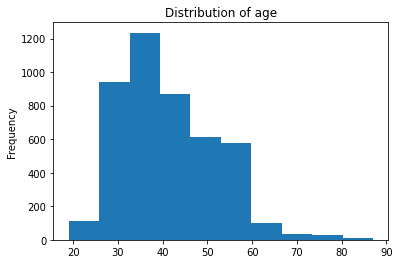

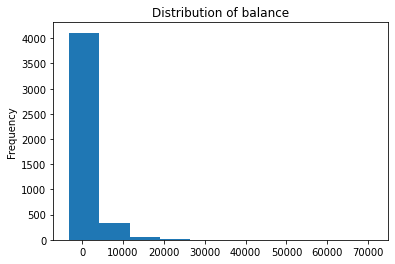

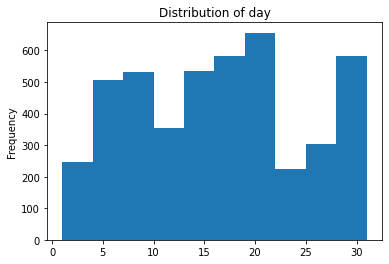

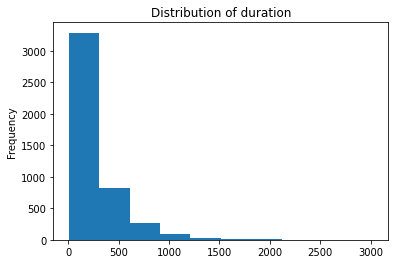

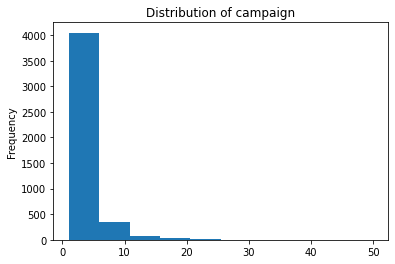

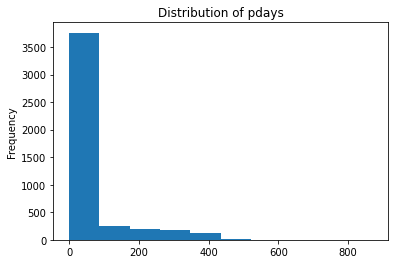

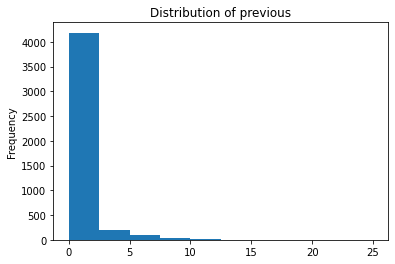

In [15]:
for col in cont_cols:
    x=df[col]
    plt.hist(df[col])
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()

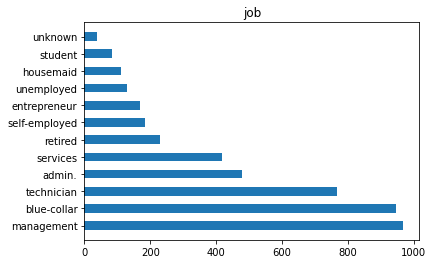

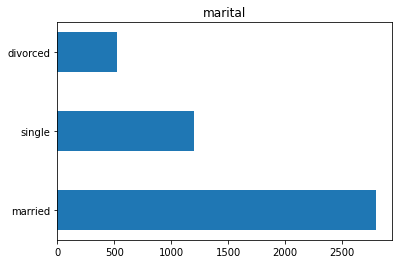

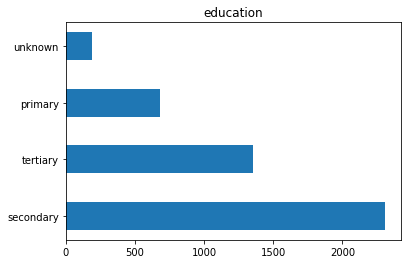

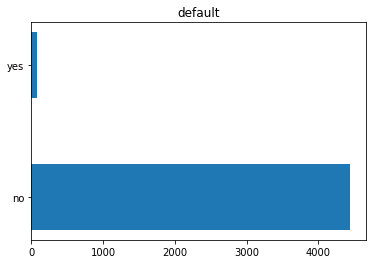

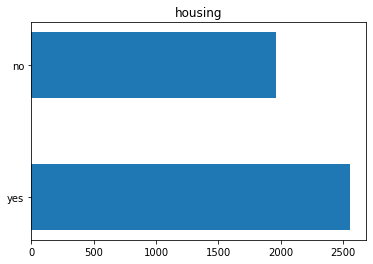

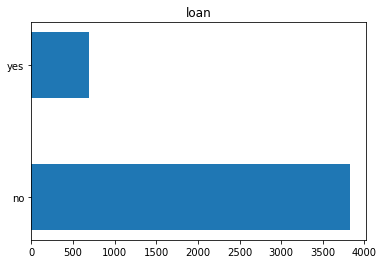

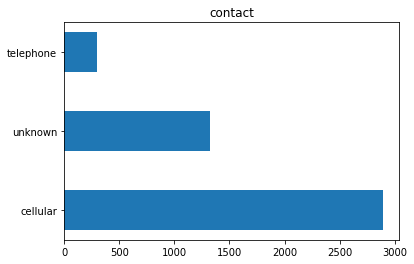

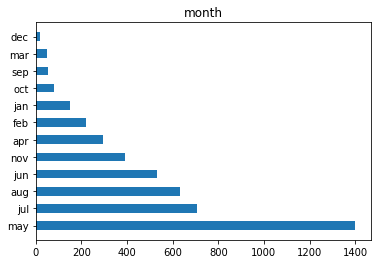

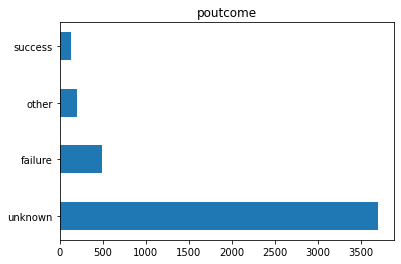

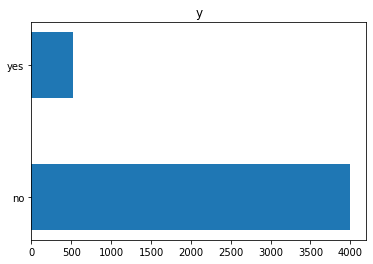

In [16]:
for col in cate_cols:
    x=df[col].value_counts()
    plt.barh(x.index, x, height=0.5)
    plt.title(f"{col}")
    plt.show()

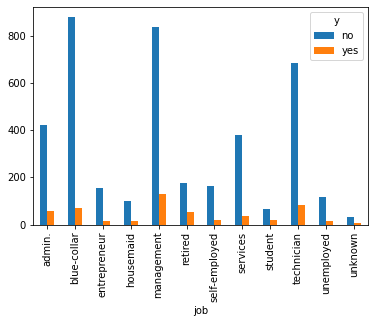

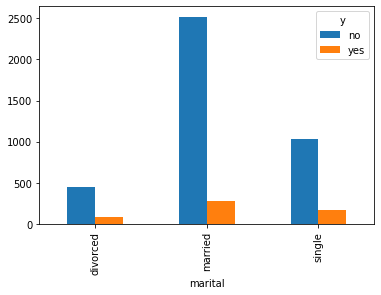

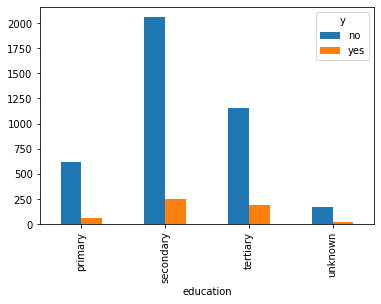

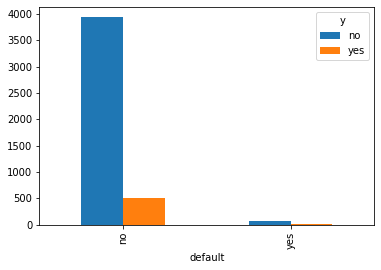

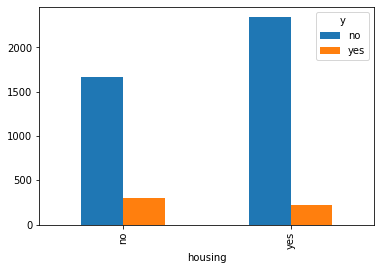

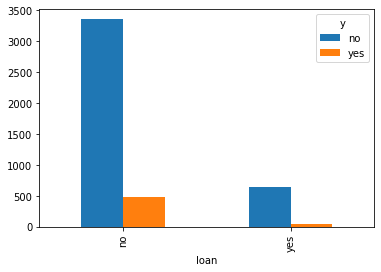

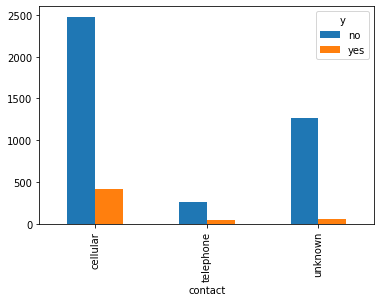

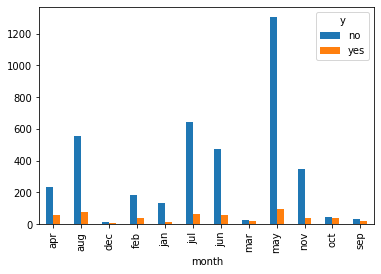

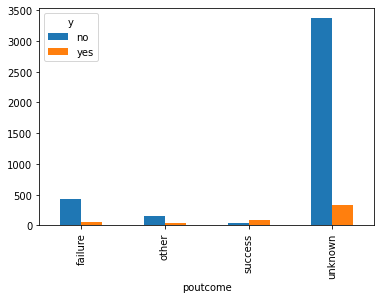

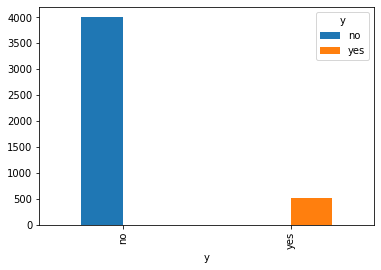

In [17]:
for col in cate_cols:
    cate_y = pd.crosstab(index=df[col],columns=df['y'])
    cate_y.plot.bar()


In [18]:
target = df["y"].value_counts().to_frame()
target = target.reset_index()
target = target.rename(columns={'index': 'Category'})
fig = px.pie(target, values='y', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()


In [19]:
corr = df.corr()

fig = px.imshow(corr,width=500, height=500)
fig.show()

In [20]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [21]:
map_y = {'yes':1, 'no':0}
df['y']=df['y'].map(map_y)

In [22]:
df['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [23]:
df['y']==0

0       True
1       True
2       True
3       True
4       True
        ... 
4516    True
4517    True
4518    True
4519    True
4520    True
Name: y, Length: 4521, dtype: bool

In [24]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,0


In [25]:
#To understand how many days of a year did the customer use the services we would be adding the days leading upto that month with last day of contact by the customer
months = {"jan":0, "feb":31, "mar":59, "apr":90, "may":120, "jun":150, "jul":181, "aug":212, "sep":243, "oct":273, "nov":304, "dec":334}
df["month"] = df["month"].map(lambda x: months[x])
df["day_of_year"] = df["day"] + df["month"]
df.drop(["month","day"], axis=1, inplace=True)

In [26]:
df["duration"] = df["duration"] / 60

# Changing order of columns
df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,14]]
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,1.316667,1,-1,0,unknown,292,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,3.666667,1,339,4,failure,131,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,3.083333,1,330,1,failure,106,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3.316667,4,-1,0,unknown,153,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,3.766667,1,-1,0,unknown,125,0


In [27]:
from category_encoders.count import CountEncoder


col_to_transform = [col for col in cate_cols if col != "day_of_year" and col != "y"]

col_to_transform

col_to_transform.remove('month')

CEnc = CountEncoder(cols=col_to_transform, normalize=True)
transformed_data = CEnc.fit_transform(X=df)


In [28]:
transformed_data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,day_of_year,y
0,30,0.028312,0.618668,0.149967,0.98319,1787,0.433975,0.847158,0.640566,1.316667,1,-1,0,0.819509,292,0
1,33,0.092236,0.618668,0.510064,0.98319,4789,0.566025,0.152842,0.640566,3.666667,1,339,4,0.108383,131,0
2,35,0.214333,0.264543,0.298607,0.98319,1350,0.566025,0.847158,0.640566,3.083333,1,330,1,0.108383,106,0
3,30,0.214333,0.618668,0.298607,0.98319,1476,0.566025,0.152842,0.292856,3.316667,4,-1,0,0.819509,153,0
4,59,0.209246,0.618668,0.510064,0.98319,0,0.566025,0.847158,0.292856,3.766667,1,-1,0,0.819509,125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0.092236,0.618668,0.510064,0.98319,-333,0.566025,0.847158,0.640566,5.483333,5,-1,0,0.819509,211,0
4517,57,0.040478,0.618668,0.298607,0.01681,-3313,0.566025,0.152842,0.292856,2.550000,1,-1,0,0.819509,129,0
4518,57,0.169874,0.618668,0.510064,0.98319,295,0.433975,0.847158,0.640566,2.516667,11,-1,0,0.819509,231,0
4519,28,0.209246,0.618668,0.510064,0.98319,1137,0.433975,0.847158,0.640566,2.150000,4,211,3,0.043574,37,0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, Y_train, Y_test = train_test_split(transformed_data.iloc[:,:-1], transformed_data.iloc[:,-1], 
                                                    test_size=0.2, stratify=transformed_data.iloc[:,-1])

In [30]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
res = RF.predict(X_test)
print(classification_report(Y_test, res))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       801
           1       0.67      0.25      0.36       104

    accuracy                           0.90       905
   macro avg       0.79      0.62      0.65       905
weighted avg       0.88      0.90      0.88       905



In [43]:
from sklearn import metrics
cm_RF= metrics.confusion_matrix(Y_test, res)
print(cm_RF)

[[788  13]
 [ 78  26]]


Feature Selection

In [31]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")


<BarContainer object of 15 artists>

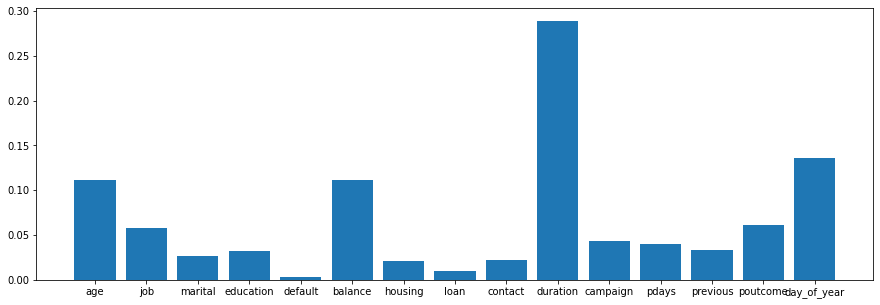

In [32]:
plt.figure(figsize=(15,5))
plt.bar(X_train.columns, RF.feature_importances_)

In [33]:
X_train.drop(["default"], axis=1, inplace=True)

Random Forest

In [34]:
Rfc = RandomForestClassifier()

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

parameters = {"n_estimators":[70,80,90,100,110,120],
              "max_depth":[4,5,6,7]}

gradboosting_randomforest = GridSearchCV(estimator=Rfc, param_grid=parameters)
gradboosting_randomforest.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'n_estimators': [70, 80, 90, 100, 110, 120]})

In [36]:
print(gradboosting_randomforest.best_score_)

0.8954651047278451


In [37]:
transformed_data.dtypes

age              int64
job            float64
marital        float64
education      float64
default        float64
balance          int64
housing        float64
loan           float64
contact        float64
duration       float64
campaign         int64
pdays            int64
previous         int64
poutcome       float64
day_of_year      int64
y                int64
dtype: object

In [38]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {"n_estimators":[70,80,90,100,110],
              "learning_rate":[0.05,0.07,0.1,0.15,0.2]}

Ada = AdaBoostClassifier()
Grid_Ada = GridSearchCV(estimator=Ada, param_grid=parameters, cv=4)
Grid_Ada.fit(X_train, Y_train)

print(Grid_Ada.best_score_)

0.8910398230088495


In [39]:
X_test.drop(["default"], axis=1, inplace=True)

In [40]:
from sklearn.linear_model import LogisticRegression
 
LR = LogisticRegression()
LR.fit(X_train, Y_train)
ypred_LR = LR.predict(X_test)
print(classification_report(Y_test, ypred_LR))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       801
           1       0.37      0.07      0.11       104

    accuracy                           0.88       905
   macro avg       0.63      0.53      0.52       905
weighted avg       0.83      0.88      0.84       905



In [42]:
from sklearn import metrics
cm_LR = metrics.confusion_matrix(Y_test, ypred_LR)
print(cm_LR)

[[789  12]
 [ 97   7]]
